# ARIMA load and generation forecast

In [1]:
project_home = %env PROJECT_HOME
%cd $project_home

F:\ai_voucher\MeritOrderPrediction


In [2]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px
from math import sqrt

In [3]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
#https://machinelearningmastery.com/make-sample-forecasts-arima-python/
# http://www.reiter1.com/Glossar/ARIMA.htm

# Load forecasting

### Read in load data

In [4]:
data = pd.read_csv("./data/load_data.csv",
                   header=[0],
                   index_col=0,
                   parse_dates=True
                  )

data.index = pd.to_datetime(data.index,
                            utc=True
                           ).tz_convert(tz="Europe/Berlin")

In [22]:
data = data["2020-01-01":"2020-12-31"].resample("1H").mean() # resample data to 1 hour resolution

### make auto-correlation 

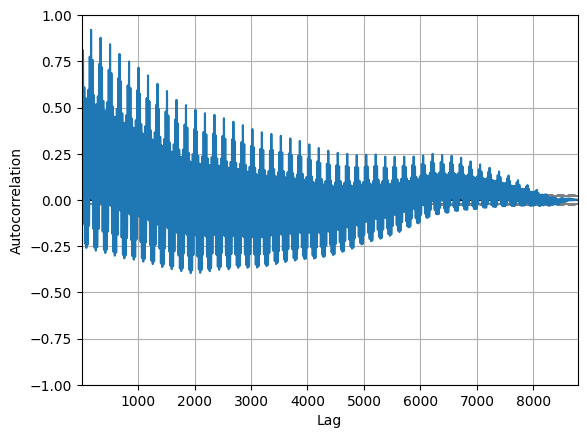

In [23]:
autocorrelation_plot(data)
plt.show()

# Predition model

### define train and test dataset

In [97]:
train = data["2020-01-01":"2020-01-07"]
test = data["2020-01-08":"2020-01-14"]

### make predictions

In [98]:
predictions = pd.DataFrame()
MAPE = []
MAE = []
RMSE = []

# iterate through the test dataset,day by day
for i in range(0, len(test),24):
    start = test.index[i]
    end = test.index[i+23]
    
    # train the model order=(AR,I,MA)
    model = ARIMA(train, order=(168,1,0), freq=data.index.freq)
    
    # fit the model
    model_fit = model.fit()
    
    # make prediction from start to end index
    forecast = model_fit.forecast(24, alpha=0.05)  # 95% conf
    #forecast = model_fit.predict(start, end)
    
    # add predictions to result dataframe
    predictions = pd.concat([predictions, forecast], axis=0)
    
    # observed data for the prediction period
    obs = test[start:end]
    
    # add oberserved data to the training set for training before the next prediction period
    train = pd.concat([train, obs], axis=0)
    
    print(model_fit.summary())
    
    # evaluate forecasts
    mae = sqrt(mean_absolute_error(obs, forecast))
    print('Test MAE: %.3f' % mae)
    MAE.append(mae)
    
    rmse = sqrt(mean_squared_error(obs, forecast))
    print('Test RMSE: %.3f' % rmse)
    RMSE.append(rmse)
    
    mape = mean_absolute_percentage_error(obs, forecast)
    print('Test MAPE: %.3f' % mape)
    MAPE.append(mape)

C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                  168
Model:               ARIMA(168, 1, 0)   Log Likelihood               -1399.121
Date:                Tue, 07 Feb 2023   AIC                           3136.242
Time:                        14:54:49   BIC                           3663.183
Sample:                    01-01-2020   HQIC                          3350.115
                         - 01-07-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1423    132.111     -0.001      0.999    -259.076     258.791
ar.L2          0.1001    197.698      0.001      1.000    -387.380     387.581
ar.L3          0.0864     97.195      0.001      0.9

C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                  192
Model:               ARIMA(168, 1, 0)   Log Likelihood            -2656382.484
Date:                Tue, 07 Feb 2023   AIC                        5313102.968
Time:                        15:08:51   BIC                        5313652.602
Sample:                    01-01-2020   HQIC                       5313325.595
                         - 01-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9465      0.001  -1211.315      0.000      -0.948      -0.945
ar.L2         -0.1539      0.001   -157.597      0.000      -0.156      -0.152
ar.L3          0.4854      0.001    655.509      0.0

C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                  216
Model:               ARIMA(168, 1, 0)   Log Likelihood            -2391219.007
Date:                Tue, 07 Feb 2023   AIC                        4782776.014
Time:                        15:22:44   BIC                        4783345.652
Sample:                    01-01-2020   HQIC                       4783006.174
                         - 01-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3017   9.03e-05  -3341.672      0.000      -0.302      -0.301
ar.L2          0.0822   8.83e-05    930.729      0.000       0.082       0.082
ar.L3         -0.0054   6.61e-05    -81.009      0.0

C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                  240
Model:               ARIMA(168, 1, 0)   Log Likelihood            -2676444.753
Date:                Tue, 07 Feb 2023   AIC                        5353227.507
Time:                        15:37:24   BIC                        5353815.029
Sample:                    01-01-2020   HQIC                       5353464.262
                         - 01-10-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2289    2.2e-05   1.04e+04      0.000       0.229       0.229
ar.L2          0.0844   2.53e-05   3340.912      0.000       0.084       0.084
ar.L3         -0.1467   2.39e-05  -6125.822      0.0

C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                  264
Model:               ARIMA(168, 1, 0)   Log Likelihood            -3479063.866
Date:                Tue, 07 Feb 2023   AIC                        6958465.732
Time:                        15:52:08   BIC                        6959069.426
Sample:                    01-01-2020   HQIC                       6958708.343
                         - 01-11-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2222   1.44e-05   1.54e+04      0.000       0.222       0.222
ar.L2          0.2026   1.47e-05   1.38e+04      0.000       0.203       0.203
ar.L3         -0.0287   1.54e-05  -1865.173      0.0

C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                  288
Model:               ARIMA(168, 1, 0)   Log Likelihood            -2808466.379
Date:                Tue, 07 Feb 2023   AIC                        5617270.758
Time:                        16:07:52   BIC                        5617889.211
Sample:                    01-01-2020   HQIC                       5617518.624
                         - 01-12-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0816    1.6e-05   5087.556      0.000       0.082       0.082
ar.L2          0.3065   1.58e-05   1.94e+04      0.000       0.306       0.307
ar.L3          0.1524   1.41e-05   1.08e+04      0.0

C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                  312
Model:               ARIMA(168, 1, 0)   Log Likelihood            -6446178.605
Date:                Tue, 07 Feb 2023   AIC                       12892695.211
Time:                        16:23:42   BIC                       12893327.236
Sample:                    01-01-2020   HQIC                      12892947.840
                         - 01-13-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0223   7.96e-06   2800.743      0.000       0.022       0.022
ar.L2          0.2550    8.8e-06    2.9e+04      0.000       0.255       0.255
ar.L3         -0.0041   7.35e-06   -559.257      0.0

## Plot the results

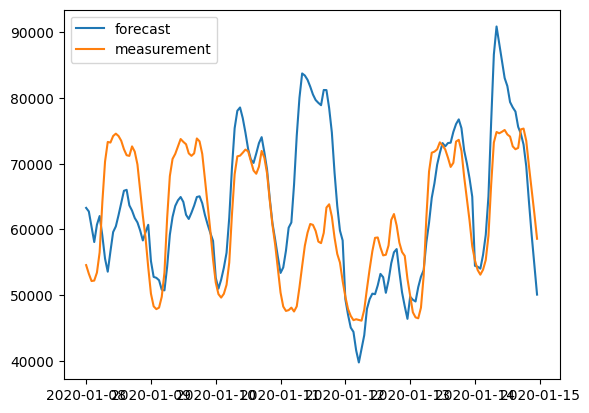

In [99]:
plt.plot(predictions)
plt.plot(test)
plt.legend(["forecast", "measurement"])

# Generation type forecasting

## Read in generation data

In [10]:
data_gen = pd.DataFrame()
data_gen = pd.read_csv("./data/entsoe_gen.csv",
                   header=[0],
                   index_col=0,
                   decimal=",",
                   low_memory=False,
                  ).drop(
    ['Fossil Gas.1',
     'Fossil Oil.1',
     'Hydro Water Reservoir.1',
     'Nuclear.1',
     'Other renewable.1',
     'Solar.1',
     'Wind Onshore.1'],
    axis=1,
)

data_gen.drop(index=data_gen.index[0], axis=0, inplace=True)

data_gen.index = pd.to_datetime(data_gen.index,
                                    utc=True
                                    ).tz_convert(tz="Europe/Berlin")

In [11]:
data_gen = data_gen.astype(float)

In [12]:
data_gen = data_gen["2020-01-01":"2020-01-31"].resample("1H").mean()

## Make generation prediction of all different generation types

In [15]:
Predictions = pd.DataFrame()
MAPE = pd.DataFrame()
MAE = pd.DataFrame()
RMSE = pd.DataFrame()
Observed = pd.DataFrame()

for col in data_gen.columns:
    predictions = pd.DataFrame()
    mape_ = []
    rmse_ = []
    mae_ = []

    train = data_gen[col]["2020-01-01":"2020-01-07"]
    test = data_gen[col]["2020-01-08":"2020-01-10"]

    # iterate through the test dataset,day by day
    for i in range(0, len(test),24):
        start = test.index[i]
        end = test.index[i+23]

        # train the model order=(AR,I,MA)
        model = ARIMA(train, order=(72,1,24))

        # fit the model
        model_fit = model.fit()

        # make prediction from start to end index
        forecast = model_fit.predict(start, end)

        # add predictions to result dataframe
        predictions = pd.concat([predictions, forecast], axis=0)

        # observed data for the prediction period
        obs = test[start:end]

        # add oberserved data to the training set for training before the next prediction period
        train = pd.concat([train, obs], axis=0)

        # evaluate forecasts
        mae = sqrt(mean_absolute_error(obs, forecast))
        print('Test MAE: %.3f' % mae)
        mae_.append(mae)

        rmse = sqrt(mean_squared_error(obs, forecast))
        print('Test RMSE: %.3f' % rmse)
        rmse_.append(rmse)

        mape = mean_absolute_percentage_error(obs, forecast)
        print('Test MAPE: %.3f' % mape)
        mape_.append(mape)
    
    Predictions[col] = predictions
    Observed[col] = test
    MAPE[col] = mape_
    MAE[col] = mae_
    RMSE[col] = rmse_


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 8.118
Test RMSE: 81.797
Test MAPE: 0.014


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 7.131
Test RMSE: 62.138
Test MAPE: 0.010


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 7.095
Test RMSE: 77.258
Test MAPE: 0.010


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 49.021
Test RMSE: 2500.319
Test MAPE: 0.218


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 29.429
Test RMSE: 1045.828
Test MAPE: 0.078


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 31.856
Test RMSE: 1144.463
Test MAPE: 0.088


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 46.878
Test RMSE: 2659.191
Test MAPE: 0.241


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 54.195
Test RMSE: 3596.353
Test MAPE: 0.400


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 28.315
Test RMSE: 954.621
Test MAPE: 0.107


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 53.079
Test RMSE: 3180.029
Test MAPE: 0.339


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 61.995
Test RMSE: 4587.803
Test MAPE: 0.635


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 33.303
Test RMSE: 1297.746
Test MAPE: 0.169


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 5.533
Test RMSE: 52.576
Test MAPE: 0.065


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 6.002
Test RMSE: 37.005
Test MAPE: 0.077


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 6.123
Test RMSE: 43.586
Test MAPE: 0.080


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 0.986
Test RMSE: 1.149
Test MAPE: 0.038


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 1.605
Test RMSE: 3.434
Test MAPE: 0.122


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 1.030
Test RMSE: 1.425
Test MAPE: 0.044


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 23.998
Test RMSE: 747.905
Test MAPE: 0.485


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 26.664
Test RMSE: 871.068
Test MAPE: 6.481


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 25.505
Test RMSE: 781.631
Test MAPE: 1.240


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 32.233
Test RMSE: 1252.223
Test MAPE: 6.772


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 31.495
Test RMSE: 1218.927
Test MAPE: 1.593


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 32.453
Test RMSE: 1241.365
Test MAPE: 1.503


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 3.833
Test RMSE: 18.280
Test MAPE: 0.011


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 6.739
Test RMSE: 59.577
Test MAPE: 0.033


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 6.762
Test RMSE: 56.673
Test MAPE: 0.033


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 6.276
Test RMSE: 47.304
Test MAPE: 0.599


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 4.767
Test RMSE: 32.422
Test MAPE: 0.562


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 7.158
Test RMSE: 65.376
Test MAPE: 1.017


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 12.378
Test RMSE: 179.785
Test MAPE: 0.019


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 15.644
Test RMSE: 268.951
Test MAPE: 0.031


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 19.396
Test RMSE: 497.324
Test MAPE: 0.050


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 4.287
Test RMSE: 23.983
Test MAPE: 0.046


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 3.542
Test RMSE: 16.397
Test MAPE: 0.030


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 3.910
Test RMSE: 20.548
Test MAPE: 0.040


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 2.320
Test RMSE: 7.330
Test MAPE: 0.030


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 2.298
Test RMSE: 7.234
Test MAPE: 0.029


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 3.844
Test RMSE: 17.086
Test MAPE: 0.085


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 34.180
Test RMSE: 1585.676
Test MAPE: 1733916708717419520.000


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 14.532
Test RMSE: 289.097
Test MAPE: 437040757068372032.000


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 18.531
Test RMSE: 583.353
Test MAPE: 185993190919447168.000


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 3.184
Test RMSE: 12.816
Test MAPE: 0.012


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 4.864
Test RMSE: 27.735
Test MAPE: 0.029


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 4.261
Test RMSE: 24.712
Test MAPE: 0.023


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 42.818
Test RMSE: 2032.514
Test MAPE: 0.645


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 41.322
Test RMSE: 1914.463
Test MAPE: 1.013


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 37.981
Test RMSE: 1943.805
Test MAPE: 0.621


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 70.112
Test RMSE: 6340.955
Test MAPE: 0.395


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 115.527
Test RMSE: 15195.633
Test MAPE: 0.658


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 45.133
Test RMSE: 2558.666
Test MAPE: 0.093


# Plot results for all diffenrent generation types 

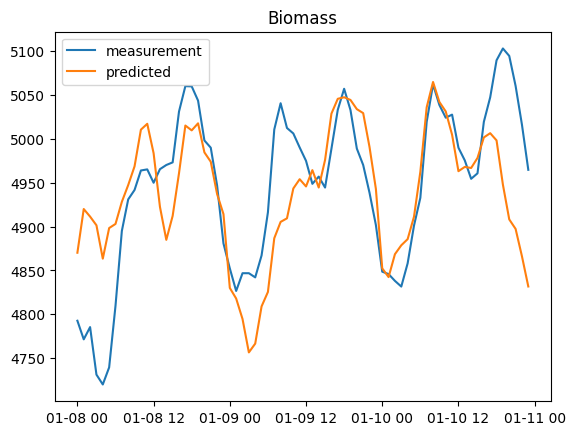

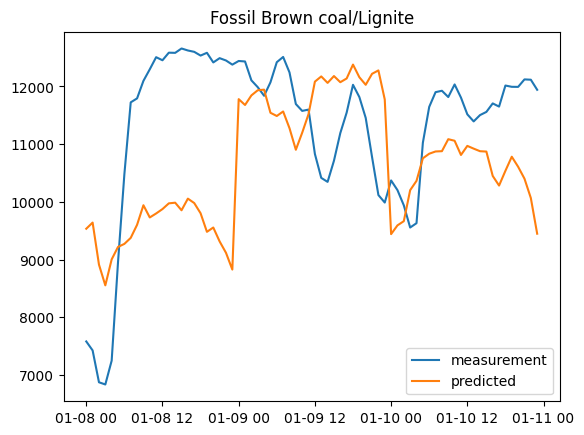

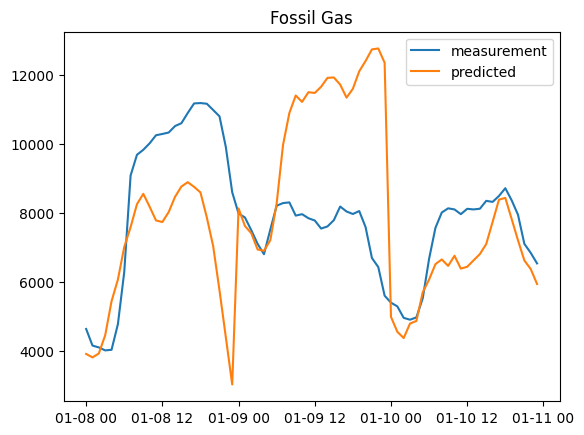

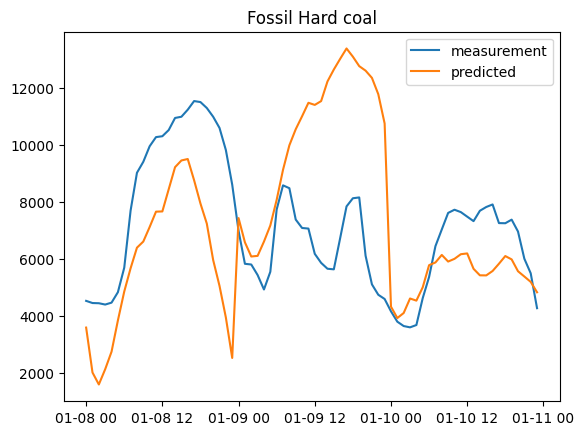

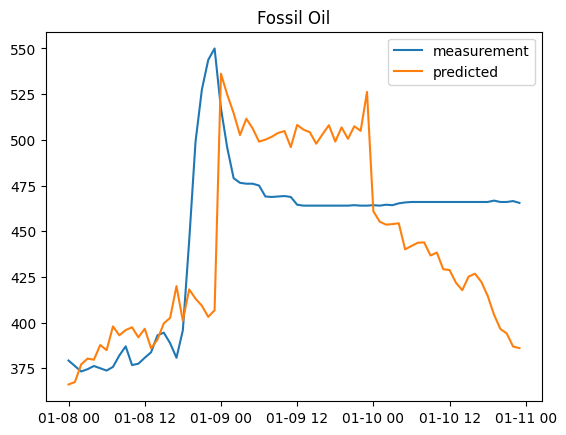

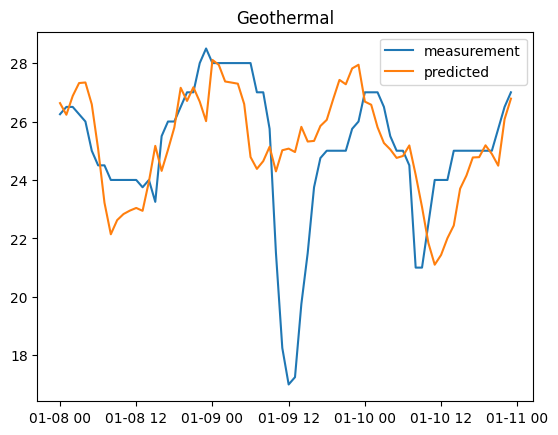

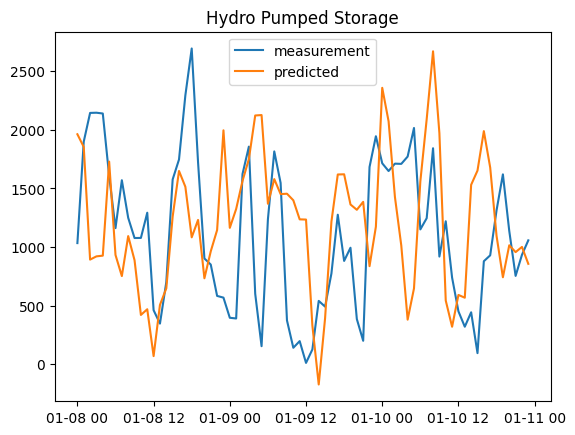

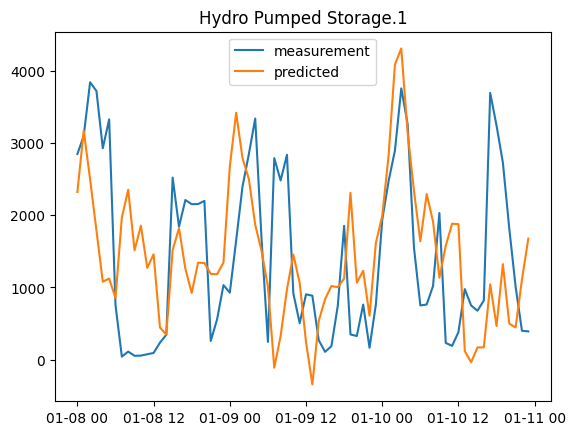

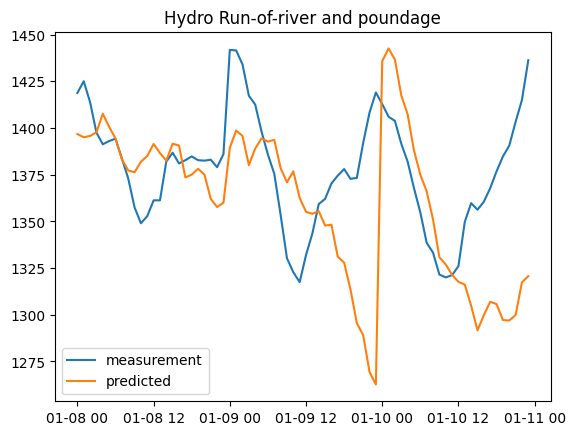

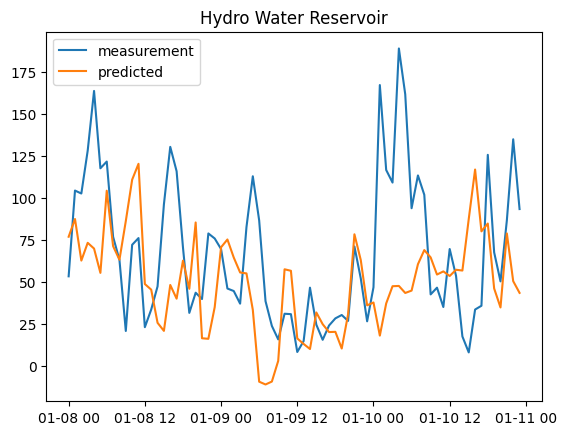

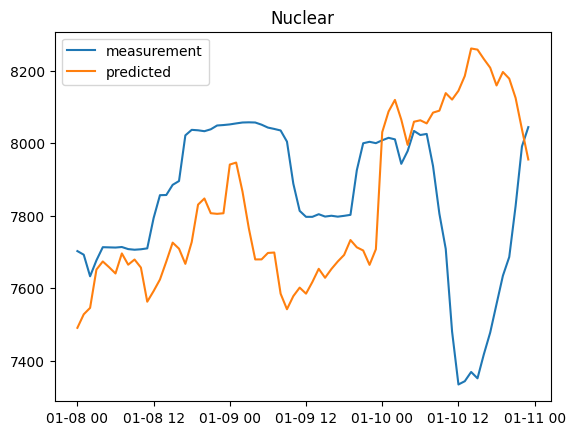

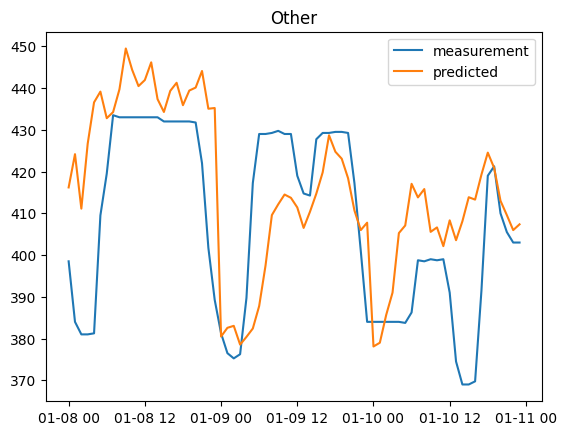

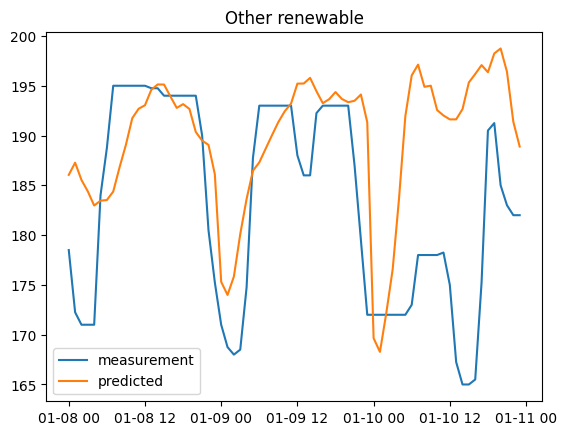

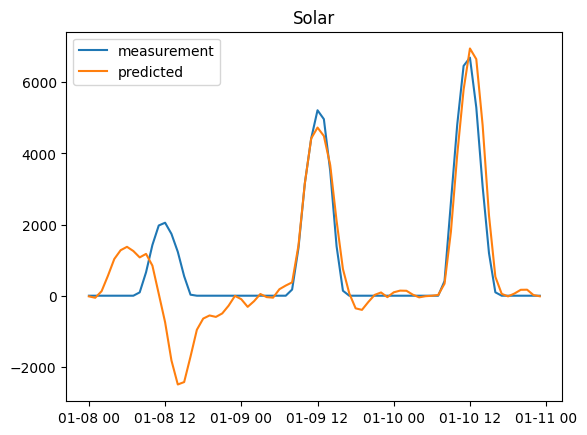

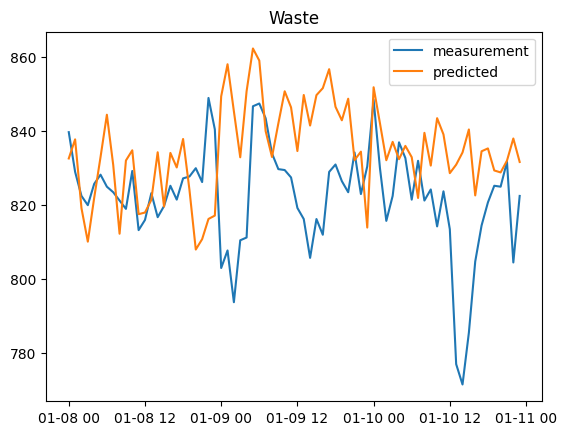

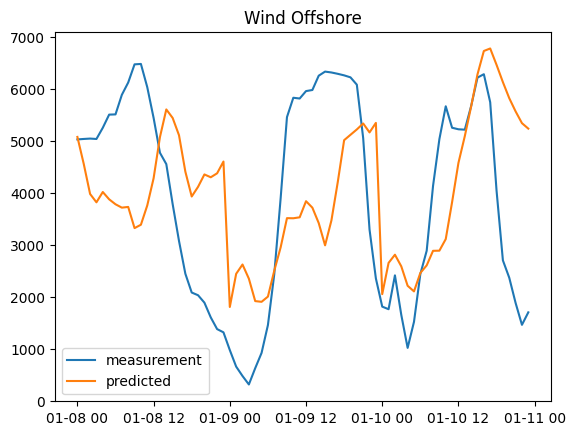

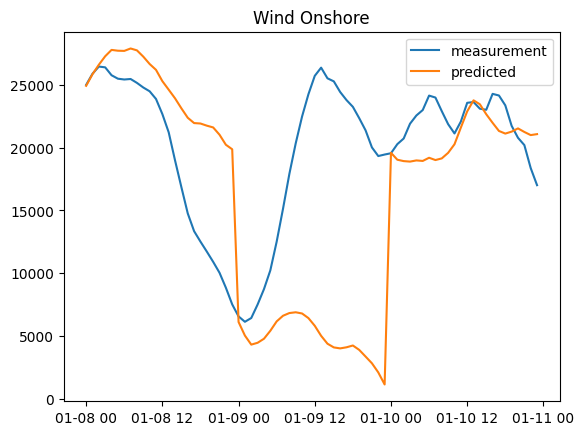

In [16]:
for col in Predictions.columns:
    plt.plot(Observed[col])
    plt.plot(Predictions[col])
    plt.legend(["measurement", "predicted"])
    plt.title(col)
    plt.show()